In [1]:
! pip install polars

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 49.1 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
import polars as pl

In [4]:
data = {
    "nombre" : ["Alicia","Marco","Pedro"],
    "Edad" : [30,20,30],
    "Salario" : [3000,5000,7000]
}
df = pl.DataFrame(data)

In [7]:
df.describe()

statistic,nombre,Edad,Salario
str,str,f64,f64
"""count""","""3""",3.0,3.0
"""null_count""","""0""",0.0,0.0
"""mean""",null,26.666667,5000.0
"""std""",null,5.773503,2000.0
"""min""","""Alicia""",20.0,3000.0
"""25%""",null,30.0,5000.0
"""50%""",null,30.0,5000.0
"""75%""",null,30.0,7000.0
"""max""","""Pedro""",30.0,7000.0


In [8]:
df["Edad"].hist()

break_point,category,count
f64,cat,u32
19.0,"""(-inf, 19.0]""",0
20.0,"""(19.0, 20.0]""",1
21.0,"""(20.0, 21.0]""",0
22.0,"""(21.0, 22.0]""",0
23.0,"""(22.0, 23.0]""",0
…,…,…
27.0,"""(26.0, 27.0]""",0
28.0,"""(27.0, 28.0]""",0
29.0,"""(28.0, 29.0]""",0


In [10]:
df.columns

['nombre', 'Edad', 'Salario']

In [11]:
df.schema

OrderedDict([('nombre', String), ('Edad', Int64), ('Salario', Int64)])

In [12]:
import numpy as np

In [26]:
num_row = 5000
rng = np.random.default_rng(seed=6)

data = {
    "abc": rng.exponential(scale = 1000, size = num_row),
    "yyyy": rng.integers(low = 1995, high = 2024, size = num_row),
    "tipo": rng.choice(['A','B','C'], size = num_row)
}

In [27]:
df = pl.DataFrame(data)
df.head()

abc,yyyy,tipo
f64,i64,str
691.262417,1999,"""B"""
183.450091,2009,"""B"""
602.713529,2002,"""B"""
535.883635,2021,"""A"""
734.729888,2004,"""A"""


In [28]:
df.shape

(5000, 3)

In [29]:
df.select('abc')

abc
f64
691.262417
183.450091
602.713529
535.883635
734.729888
…
473.241886
476.181568
1059.974062


In [30]:
df.select(pl.col('abc').sort() / 1000)

abc
f64
0.000154
0.000934
0.001006
0.001129
0.001596
…
7.567751
7.753024
7.761074


In [31]:
df_2020 = df.filter(pl.col('yyyy')>2020)

In [32]:
df_2020

abc,yyyy,tipo
f64,i64,str
535.883635,2021,"""A"""
459.910574,2022,"""B"""
1127.481441,2022,"""C"""
1775.775932,2021,"""C"""
1814.18821,2021,"""B"""
…,…,…
1083.121706,2023,"""B"""
755.9895,2023,"""B"""
1766.175209,2021,"""B"""


In [33]:
df.group_by('tipo').agg(
    pl.mean("abc").alias("mean_abc"),
    pl.median("yyyy").alias("median_yyyy"),
    pl.len()
)

tipo,mean_abc,median_yyyy,len
str,f64,f64,u32
"""A""",971.179181,2009.0,1666
"""B""",981.124779,2009.0,1642
"""C""",966.720129,2009.0,1692


In [4]:
import numpy as np
import polars as pl
 
num_rows = 5000
rng = np.random.default_rng(seed=7)
 
buildings = {
     "sqft": rng.exponential(scale=1000, size=num_rows),
     "price": rng.exponential(scale=100_000, size=num_rows),
     "year": rng.integers(low=1995, high=2023, size=num_rows),
     "building_type": rng.choice(["A", "B", "C"], size=num_rows),
  }
buildings_lazy = pl.LazyFrame(buildings)
buildings_lazy
 
lazy_query = (
    buildings_lazy
    .with_columns(
        (pl.col("price") / pl.col("sqft")).alias("price_per_sqft")
    )
    .filter(pl.col("price_per_sqft") > 100)
    .filter(pl.col("year") < 2010)
)
lazy_query

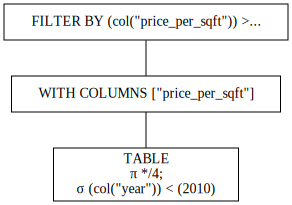

In [5]:
lazy_query.show_graph()

In [6]:
print(lazy_query.explain())

FILTER [(col("price_per_sqft")) > (100.0)] FROM
 WITH_COLUMNS:
 [[(col("price")) / (col("sqft"))].alias("price_per_sqft")], [] 
  DF ["sqft", "price", "year", "building_type"]; PROJECT */4 COLUMNS; SELECTION: [(col("year")) < (2010)]


In [7]:
lazy_query.collect()

sqft,price,year,building_type,price_per_sqft
f64,f64,i64,str,f64
9.753627,31876.709467,1996,"""B""",3268.19045
575.332756,157836.308297,2000,"""A""",274.339166
541.135894,160706.384529,2004,"""C""",296.979717
312.145612,118260.959791,2002,"""C""",378.86472
1223.566418,155763.172528,1995,"""B""",127.302589
…,…,…,…,…
300.07268,79730.200062,2008,"""B""",265.702962
45.167911,112098.176874,2009,"""B""",2481.810063
99.773084,69661.948942,2008,"""C""",698.203822


In [11]:
import requests
import pathlib
 
def download_file(file_url: str, local_file_path: pathlib.Path) -> None:
    """Download a file and save it with the specified file name."""
    response = requests.get(file_url)
    if response:
        local_file_path.write_bytes(response.content)
        print(f"File successfully downloaded and stored at: {local_file_path}")
    else:
        raise requests.exceptions.RequestException(
            f"Failed to download the file. Status code: {response.status_code}"
        )
 
import pathlib
 
url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
local_file_path = pathlib.Path("electric_cars.csv")
 
download_file(url, local_file_path)
 
lazy_car_data = pl.scan_csv(local_file_path)
lazy_car_data
 
 
lazy_car_data.schema
 
 
lazy_car_query = (
    lazy_car_data
    .filter((pl.col("Model Year") >= 2018))
    .filter(
        pl.col("Electric Vehicle Type") == "Battery Electric Vehicle (BEV)"
    )
    .group_by(["State", "Make"])
    .agg(
        pl.mean("Electric Range").alias("Average Electric Range"),
        pl.min("Model Year").alias("Oldest Model Year"),
        pl.len().alias("Number of Cars"),
    )
    .filter(pl.col("Average Electric Range") > 0)
    .filter(pl.col("Number of Cars") > 5)
    .sort(pl.col("Number of Cars"), descending=True)
)

File successfully downloaded and stored at: electric_cars.csv


In [12]:
import pathlib
 
url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
local_file_path = pathlib.Path("electric_cars.csv")
 
download_file(url, local_file_path)
 
lazy_car_data = pl.scan_csv(local_file_path)
lazy_car_data
 
 
lazy_car_data.schema

File successfully downloaded and stored at: electric_cars.csv


OrderedDict([('VIN (1-10)', String),
             ('County', String),
             ('City', String),
             ('State', String),
             ('Postal Code', Int64),
             ('Model Year', Int64),
             ('Make', String),
             ('Model', String),
             ('Electric Vehicle Type', String),
             ('Clean Alternative Fuel Vehicle (CAFV) Eligibility', String),
             ('Electric Range', Int64),
             ('Base MSRP', Int64),
             ('Legislative District', Int64),
             ('DOL Vehicle ID', Int64),
             ('Vehicle Location', String),
             ('Electric Utility', String),
             ('2020 Census Tract', Int64)])

In [13]:
lazy_car_query = (
    lazy_car_data
    .filter((pl.col("Model Year") >= 2018))
    .filter(
        pl.col("Electric Vehicle Type") == "Battery Electric Vehicle (BEV)"
    )
    .group_by(["State", "Make"])
    .agg(
        pl.mean("Electric Range").alias("Average Electric Range"),
        pl.min("Model Year").alias("Oldest Model Year"),
        pl.len().alias("Number of Cars"),
    )
    .filter(pl.col("Average Electric Range") > 0)
    .filter(pl.col("Number of Cars") > 5)
    .sort(pl.col("Number of Cars"), descending=True)
)

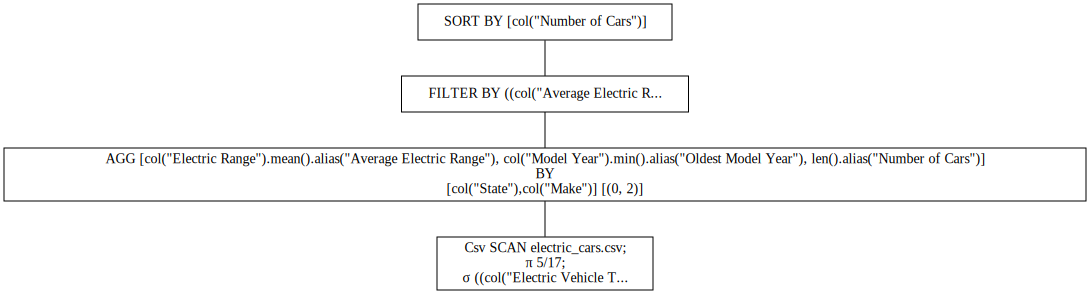

In [14]:
lazy_car_query.show_graph()

In [15]:
lazy_car_query.filter(pl.col('State') == 'NC').collect()

State,Make,Average Electric Range,Oldest Model Year,Number of Cars
str,str,f64,i64,u32
"""NC""","""TESLA""",23.888889,2018,9
